In [2]:
import os
import google.genai as genai
from gradio_client import Client
from dotenv import load_dotenv
from PIL import Image
import matplotlib.pyplot as plt
load_dotenv()

True

In [3]:
client = Client("stabilityai/stable-diffusion")
result = client.predict(
		prompt="Industry Grade GPU center",
        negative='No text should be present in the image.',
		scale=9,
		api_name="/infer"
)

Loaded as API: https://stabilityai-stable-diffusion.hf.space ✔


In [4]:
# result

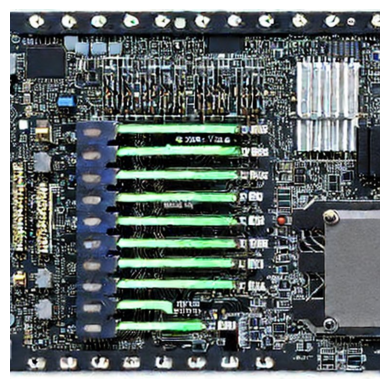

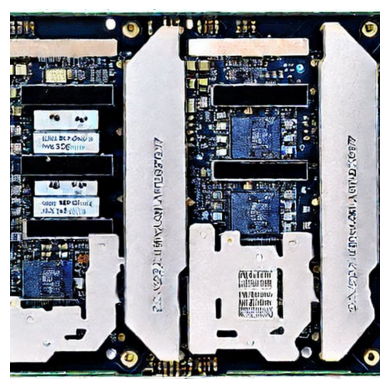

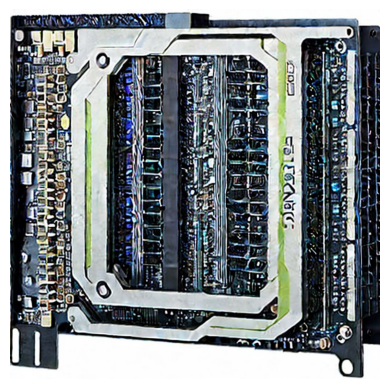

In [5]:
for block in result:
    image = Image.open(block['image'])
    plt.imshow(image)
    plt.grid('off')
    plt.axis('off')
    plt.show()

# Testing Gemini

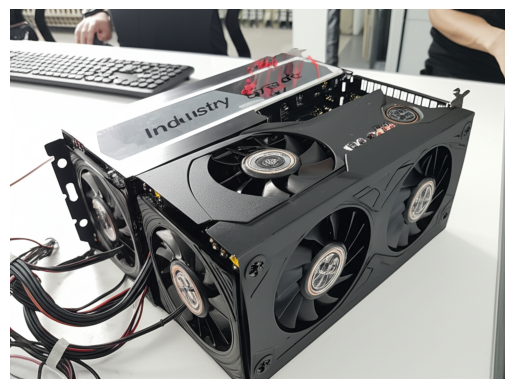

In [6]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import base64

client = genai.Client(api_key=os.getenv('GEMINI_API_KEY'))

contents = ('Industry Grade GPU center', 'No text should be present in the image.')

response = client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(
      response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
# Gemini outperforms in quality

In [8]:
def construct_image_gen_prompt(content, additional_info=None):
    client = genai.Client(api_key=os.getenv('GEMINI_API_KEY'))
    gemini_prompt = f'''
    You are an expert prompt engineer who generates prompt based on the content and scenario.
    The following is the content based on which you have to make an optimized prompt which will be passed to an image generation model:
    {content}

    Keep these things in mind while generating the prompt:
    1. Be specific, even if it takes time.
    2. Be to the point.
    3. Only generate prompt. No filler text or boiler starting text from your side. Just pure prompt.
    4. No highlighted headers or messages.
    '''
    if additional_info is not None:
        gemini_prompt = gemini_prompt + '\n' + f'''Also consider this additional information : {additional_info}'''\
    
    response = client.models.generate_content(
        model='gemini-2.0-flash-lite',
        contents=gemini_prompt
    )

    return response.candidates[0].content.parts[0].text

In [9]:
def generate_image_diffusionAI(content, additional_info=None):
    prompt = construct_image_gen_prompt(content, additional_info)
    print(prompt)
    
    client = Client("stabilityai/stable-diffusion")
    result = client.predict(
            prompt=prompt,
            negative='No/minimal text should be present in the image.',
            scale=9,
            api_name="/infer"
    )
    return result

In [10]:
images = generate_image_diffusionAI(content='A gigachad playing Snooker',
                        additional_info='At the beach by the bay.')

A muscular, imposing gigachad playing snooker with intense focus, chalking the cue, at a vibrant beach setting by a bay. Sunlight glints off the polished snooker table and balls. The background features the azure sea, white sand, and a few palm trees swaying gently in the breeze. Hyperrealistic, photorealistic, high detail, cinematic lighting, 8k.

Loaded as API: https://stabilityai-stable-diffusion.hf.space ✔


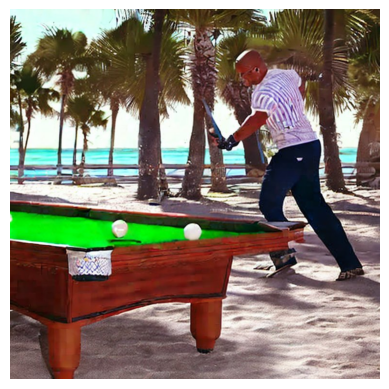

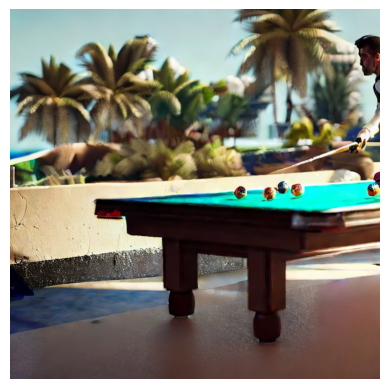

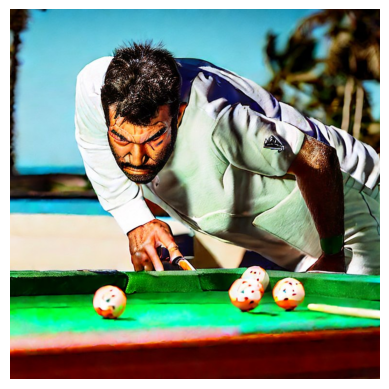

In [11]:
for block in images:
    image = Image.open(block['image'])
    plt.imshow(image)
    plt.grid('off')
    plt.axis('off')
    plt.show()

In [12]:
def generate_image_gemini(content, additional_info=None):
    client = genai.Client(api_key=os.getenv('GEMINI_API_KEY'))

    contents = (construct_image_gen_prompt(content, additional_info))
    print("CONTENT", contents)

    response = client.models.generate_content(
        model="gemini-2.0-flash-exp-image-generation",
        contents=contents,
        config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
        )
    )
    print("RESPONSE", response)
    for part in response.candidates[0].content.parts:
        if part.text is not None:
            print(part.text)
        elif part.inline_data is not None:
            image = Image.open(BytesIO((part.inline_data.data)))
            image.save('gemini-native-image.png')
            image.show()

In [13]:
generate_image_gemini(content='A gigachad playing Snooker',
                      additional_info='At the beach by the bay.')

CONTENT Gigachad, ultra-realistic, playing snooker at a beach by the bay, golden hour lighting, strong jawline, muscular physique, focused expression, confident pose, professional snooker table, blue felt, cue stick in hand, sandy beach, crystal clear water, gentle waves, sunny day, palm trees in background, photorealistic, highly detailed, 8k, cinematic lighting, volumetric light, sharp focus.

RESPONSE candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=Blob(data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x02>\x08\x02\x00\x00\x00\xad\xdf\xef3\x00\x00\x00\x89zTXtRaw profile type iptc\x00\x00\x08\x99M\x8c1\x0e\x021\x0c\x04\xfb\xbc\xe2\x9e\x908\xeb\xb5]S\xd1Q\xf0\x81\xbb\\"!!\x81\xf8\x7fA\xa0\xe0\x98iV[L:_\xae\xa7\xe5\xf9z\x8c\xdb\xbd\xa7\xe5\x0b\x91\xaaC\x10\xd83\xa6?\x8a\x97\x96\x85}\xae\x8a\x9d\x85\xa0J6c\x18\xe8

In [14]:
Image.open('./gemini-native-image.png')

In [15]:
# We will continue with Gemini